## **POSTTEST 6**
***

**Import Library Yang Digunakan**

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

**Menampilkan Dataset**

In [34]:
df = pd.read_csv('brain_stroke.csv', delimiter=',')
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


### **SPLIT DATASET**
***

In [11]:
X = df.iloc[:,:-1] 
y = df.iloc[:,-1]

**Encoding Target**

In [39]:
LE = LabelEncoder()
df['stroke'] = le.fit_transform(df['stroke'])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**Memisahkan Kolom Numerik dan Kategorikal**

In [16]:
numeric_cols = [col for col in X_train.columns if X_train[col].dtype != 'object']
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']

**Menggunakan OneHotEncoder Untuk Kolom Kategorikal**

In [18]:
encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')

In [19]:
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

**Konversi Dataset Menjadi Float32**

In [20]:
X_train[numeric_cols] = X_train[numeric_cols].astype('float32')
X_test[numeric_cols] = X_test[numeric_cols].astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

### **Model Squential**
***

**Membuat Model Sequential**

In [35]:
model = Sequential()
model.add(layers.Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                704       
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### **Menggunakan Callbacks**
***

In [42]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.93 and logs.get('val_accuracy') > 0.93):
            self.model.stop_training = True

### **Pelatihan Model**
***

In [44]:
call = MyCallback()
history = model.fit(
    X_train_encoded,
    y_train,
    epochs=10,
    batch_size = 64,
    validation_data=(X_test_encoded, y_test),
    callbacks=[call]
)

Epoch 1/10
63/63 [==============================] - 0s 6ms/step - loss: 5.6638 - accuracy: 0.5778 - val_loss: 5.6883 - val_accuracy: 0.5747
Epoch 2/10
63/63 [==============================] - 0s 4ms/step - loss: 5.6638 - accuracy: 0.5778 - val_loss: 5.6883 - val_accuracy: 0.5747
Epoch 3/10
63/63 [==============================] - 0s 4ms/step - loss: 5.6638 - accuracy: 0.5778 - val_loss: 5.6883 - val_accuracy: 0.5747
Epoch 4/10
63/63 [==============================] - 0s 4ms/step - loss: 5.6638 - accuracy: 0.5778 - val_loss: 5.6883 - val_accuracy: 0.5747
Epoch 5/10
63/63 [==============================] - 0s 4ms/step - loss: 5.6638 - accuracy: 0.5778 - val_loss: 5.6883 - val_accuracy: 0.5747
Epoch 6/10
63/63 [==============================] - 0s 3ms/step - loss: 5.6638 - accuracy: 0.5778 - val_loss: 5.6883 - val_accuracy: 0.5747
Epoch 7/10
63/63 [==============================] - 0s 3ms/step - loss: 5.6638 - accuracy: 0.5778 - val_loss: 5.6883 - val_accuracy: 0.5747
Epoch 8/10
63/63 [==

### **Evaluasi Model**
***

In [46]:
score = model.evaluate(X_test_encoded, y_test, verbose=1)
print('Test loss     :', score[0])
print('Test accuracy :', score[1])

32/32 [==============================] - 0s 3ms/step - loss: 5.6883 - accuracy: 0.5747
Test loss     : 5.688257217407227
Test accuracy : 0.5747241973876953


### **Grafik Perbandingan Accuracy dan Loss dari Train dan Test**
***

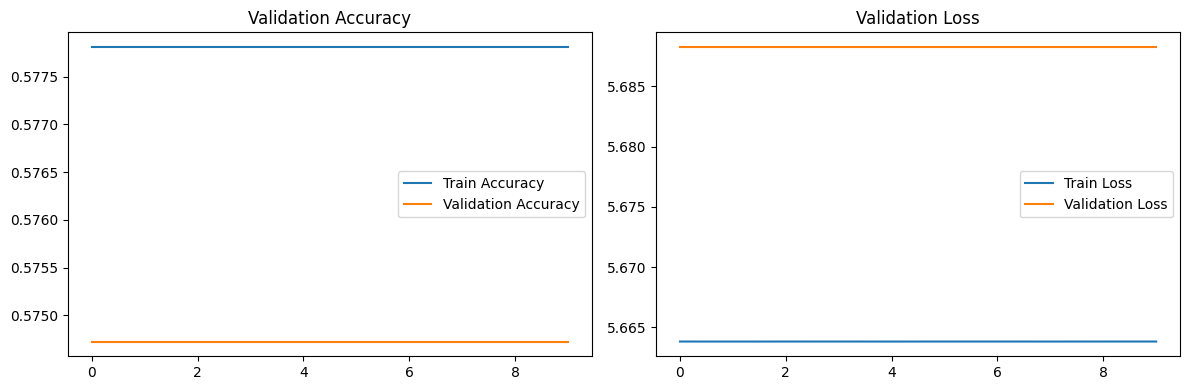

In [51]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Validation Loss')

plt.tight_layout()
plt.show()